# Importación de librerías y carga de datos

In [28]:
"""
Modulo de entrenamiento para diferentes pipelines de ML para el
entrenamiento utilizando los datasets creados. El flujo es capaz de 
generalizar en la mayoría de los casos y únicamente es necesario
realizar modificaciones en la ruta a los datos.

"""
import os
import pandas as pd 
import seaborn as sns                                                   
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from boruta import BorutaPy



In [29]:
#path=r'C:\Users\Luisa\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca\PCA_without_powers.csv'.replace('\\','/')
#path=r'C:\Users\Luisa\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca\sl\PCA_sl.csv'.replace('\\','/')

data=pd.read_csv("Occupancy_Estimation.csv",sep=",")
data = data.drop(["Date","Time",'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound'], axis=1)
data

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,345,0.000000,0,0,0


In [30]:
scaler =StandardScaler()
data_s = scaler.fit_transform(data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light','S5_CO2', 'S5_CO2_Slope']])
data_s = pd.DataFrame(data_s,columns=data.columns[:-3])
data_s

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S5_CO2_Slope
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.354382,0.664469
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,-0.354382,0.558817
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0.449864
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0.337609
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,-0.354382,0.222053
...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.579432,0.004146
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146


In [31]:
data_s[['S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']] = data[['S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']]

In [32]:
data_s

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.354382,0.664469,0,0,1
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,-0.354382,0.558817,0,0,1
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0.449864,0,0,1
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,-0.354382,0.337609,0,0,1
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,-0.354382,0.222053,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.579432,0.004146,0,0,0
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146,0,0,0
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146,0,0,0
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.579432,0.004146,0,0,0


PCA

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
pca = PCA(n_components=5)
p_components = pca.fit(data_s[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2', 'S5_CO2_Slope']])

In [35]:
data_pca = pca.transform(data_s[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2', 'S5_CO2_Slope']])
data_pca.shape

(10129, 5)

In [36]:
X_pca = data_pca
y_pca = data_s.values[:,-1]

In [37]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(                            
    X_pca, # Valores de X
    y_pca, # Valores de Y
    test_size=0.3, # Test de 30% cambiar a 30
    random_state=1, # Semilla
    stratify=data_s.values[:,-1]) # que se mantenga la proporcion en la división

In [38]:
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(                            
    X_train_pca, # Valores de X
    y_train_pca, # Valores de Y
    test_size=0.33, # Test de 20% cambiar a 30
    random_state=1, # Semilla
    stratify=y_train_pca) 

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 15)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)] # Mayor profundidad y menor cantidad de datos puede generar overfiting
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True]
criterion = ['gini',  'entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
               }

In [40]:
forestclf_grid_pca = RandomForestClassifier()

rf_random_pca = RandomizedSearchCV(
                              estimator=forestclf_grid_pca,
                              param_distributions=random_grid,
                              n_iter=50,
                              cv=5,
                              verbose=2,
                              random_state=10,
                              n_jobs=-1 # todos los nucleos del computador 
                              )

rf_random_pca.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
best_selected_pca = rf_random_pca.best_estimator_

In [ ]:
best_selected_pca.fit(X_train_pca, y_train_pca)

In [ ]:
predicted_pca = best_selected_pca.predict(X_test_pca)

In [ ]:
print(
    f"Classification report for classifier {best_selected_pca}:\n"
    f"{metrics.classification_report(y_test_pca, predicted_pca)}\n"
    )

In [78]:
X = data_s.values[:,:-1]
y = data_s.values[:,-1]
print(X.shape)
print(y.shape)

(10129, 12)
(10129,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(                            
    X, # Valores de X
    y, # Valores de Y
    test_size=0.3, # Test de 20% cambiar a 30
    random_state=1, # Semilla
    stratify=data_s.values[:,-1]) # que se mantenga la proporcion en la división

In [80]:
X_train, X_val, y_train, y_val = train_test_split(                            
    X_train, # Valores de X
    y_train, # Valores de Y
    test_size=0.33, # Test de 20% cambiar a 30
    random_state=1, # Semilla
    stratify=y_train) 

### Árboles de decisión (Grid Search)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 30)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] # Mayor profundidad y menor cantidad de datos puede generar overfiting
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True]
criterion = ['gini',  'entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
               }

In [ ]:
forestclf_grid = RandomForestClassifier()

rf_random = RandomizedSearchCV(
                              estimator=forestclf_grid,
                              param_distributions=random_grid,
                              n_iter=100,
                              cv=5,
                              verbose=2,
                              random_state=10,
                              n_jobs=-1 # todos los nucleos del computador 
                              )

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 117, 184, 251, 318,
                                                         386, 453, 520, 587,
                                                         655, 722, 789, 856,
                                                         924, 991, 1058, 1125,
                                                         1193, 1260, 1327, 1394,
                                                         1462, 1529, 1596, 1663,
                                                         1731, 1798, 1865, 1932,
                                                         2000]},
                   random_state=10, verbose=2)

In [81]:
best_selected = rf_random.best_estimator_

In [82]:
best_selected.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=2000)

In [83]:
predicted = best_selected.predict(X_test)

In [50]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

Classification report for classifier RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=2000):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       822
         1.0       0.98      1.00      0.99        45
         2.0       0.99      0.96      0.97        75
         3.0       0.97      0.99      0.98        70

    accuracy                           1.00      1012
   macro avg       0.98      0.99      0.99      1012
weighted avg       1.00      1.00      1.00      1012




In [84]:
predicted_val = best_selected.predict(X_val)

In [52]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_val, predicted_val)}\n"
    )

Classification report for classifier RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=2000):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1901
         1.0       1.00      1.00      1.00       106
         2.0       0.99      0.98      0.99       173
         3.0       0.98      0.99      0.99       160

    accuracy                           1.00      2340
   macro avg       0.99      0.99      0.99      2340
weighted avg       1.00      1.00      1.00      2340




In [54]:
scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )

In [103]:
scores_f1 = cross_val_score(
                        estimator=best_selected,
                        X=X_test,
                        y=y_test,
                        cv=10,
                        n_jobs=-1,
                        scoring='recall_weighted'
                        )

In [97]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.99145299 0.99145299 0.9957265  1.         1.         0.99145299
 1.         0.99145299 0.9957265  0.99145299]


In [105]:
print('CV f1 score scores: %s' % scores_f1)

CV f1 score scores: [0.99013158 0.99342105 0.99671053 0.99671053 0.99671053 0.99013158
 0.99013158 1.         0.99342105 0.99669967]


In [106]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores_f1), np.std(scores_f1)))


CV accuracy: 0.994 +/- 0.003


In [57]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))


CV accuracy: 0.975 +/- 0.033


In [58]:
scores = cross_val_score(
                        estimator=best_selected,
                        X=X_test,
                        y=y_test,
                        cv=10,
                        n_jobs=-1
                        )

In [59]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.96078431 0.96078431 0.94059406 0.99009901 1.         0.97029703
 1.         0.96039604 1.         0.91089109]


In [60]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))


CV accuracy: 0.969 +/- 0.028


In [64]:
scores = cross_val_score(
                        estimator=best_selected,
                        X=X_val,
                        y=y_val,
                        cv=10,
                        n_jobs=-1
                        )

In [65]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))


CV accuracy: 0.995 +/- 0.004


[[822   0   0   0]
 [  0  45   0   0]
 [  0   1  72   2]
 [  0   0   1  69]]


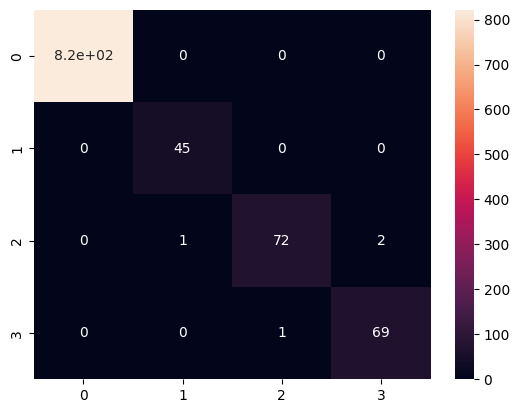

In [66]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predicted)
print(CM)
import seaborn
seaborn.heatmap(CM,annot=True)
plt.show()

[[1901    0    0    0]
 [   0  106    0    0]
 [   0    0  170    3]
 [   0    0    1  159]]


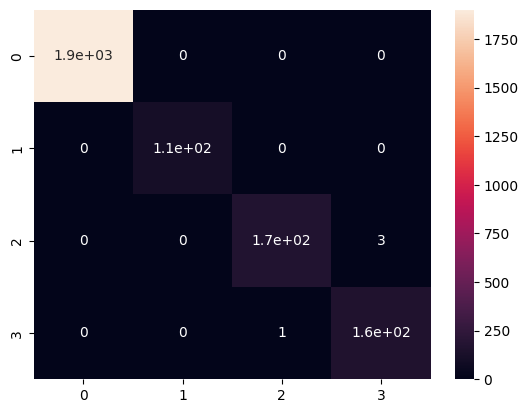

In [67]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_val, predicted_val)
print(CM)
import seaborn
seaborn.heatmap(CM,annot=True)
plt.show()

### Árboles de decisión (Boruta)

In [ ]:
feat_selector = BorutaPy(
                        verbose=2,
                        estimator=best_selected,
                        max_iter=100
                        )

In [ ]:
feat_selector.fit(X_train, y_train)

In [ ]:
selected_features = []
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", data.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
        selected_features.append(data.columns[i])

In [ ]:
X_transform = feat_selector.transform(X_train)

In [ ]:
best_selected.fit(X_transform, y_train)

In [ ]:
selected_features = [data.columns.get_loc(c) for c in selected_features if c in data]
selected_features

In [ ]:
predicted = best_selected.predict(X_test[:,selected_features])

In [ ]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

In [ ]:
scores = cross_val_score(estimator=best_selected,
                        X=X_transform,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)

In [ ]:
print('CV accuracy scores: %s' % scores)

In [ ]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))

In [ ]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_transform,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

### Selección de caracteristicas con árboles de decisión

In [ ]:
nombres_columnas = data.columns[:-1]
best_selected.fit(X_train, y_train)
features_scores = best_selected.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]
sorted_names = []

for f in range(X_train.shape[1]):

    sorted_names.append(nombres_columnas[index[f]])
    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))
    
plt.title('Importancia de la caracteristica')

plt.bar(range(X_train.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, 10])

plt.tight_layout()

plt.show()

In [ ]:
acc_per_feature = []
std_per_feature = []

for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_selected.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        range(1, len(sorted_names)),
        acc_per_feature,
        color='red'
        ) 

plt.fill_between(
                range(1, len(sorted_names)),
                acc_per_feature + std_per_feature,
                acc_per_feature - std_per_feature,
                alpha=0.15,
                color='red'
                )

plt.grid()

### SVM (Grid Search)

In [68]:
svm_param_grid = {'C': list(np.logspace(-1, 4, 6)), 
                 'gamma': list(np.logspace(-3, 2, 6)) + ['Auto'] + ['scale'],
                 'kernel': ['rbf', 'poly']} 

svc = SVC()
svc_clf = GridSearchCV(
    
                      svc,
                      svm_param_grid,
                      n_jobs=-1,
                      cv=10
                      )

svm_best_clf = svc_clf.fit(X_train, y_train)
best_model = svm_best_clf.best_estimator_

C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

In [70]:
best_model.fit(X_train, y_train)

SVC(C=10.0, gamma=0.01)

In [71]:
predicted = best_model.predict(X_test)

In [74]:
predicted_val = best_model.predict(X_val)

In [76]:
predicted_train = best_model.predict(X_train)

In [72]:
print(
    f"Classification report for classifier {best_model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

Classification report for classifier SVC(C=10.0, gamma=0.01):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       822
         1.0       0.98      1.00      0.99        45
         2.0       0.96      0.93      0.95        75
         3.0       0.94      0.96      0.95        70

    accuracy                           0.99      1012
   macro avg       0.97      0.97      0.97      1012
weighted avg       0.99      0.99      0.99      1012




In [75]:
print(
    f"Classification report for classifier {best_model}:\n"
    f"{metrics.classification_report(y_val, predicted_val)}\n"
    )

Classification report for classifier SVC(C=10.0, gamma=0.01):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1901
         1.0       1.00      1.00      1.00       106
         2.0       0.96      0.96      0.96       173
         3.0       0.96      0.96      0.96       160

    accuracy                           0.99      2340
   macro avg       0.98      0.98      0.98      2340
weighted avg       0.99      0.99      0.99      2340




In [77]:
print(
    f"Classification report for classifier {best_model}:\n"
    f"{metrics.classification_report(y_train, predicted_train)}\n"
    )

Classification report for classifier SVC(C=10.0, gamma=0.01):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7406
         1.0       1.00      0.99      1.00       414
         2.0       0.97      0.97      0.97       673
         3.0       0.97      0.98      0.97       624

    accuracy                           1.00      9117
   macro avg       0.99      0.99      0.99      9117
weighted avg       1.00      1.00      1.00      9117




### SVM (Permutation importance)

In [ ]:
results = permutation_importance(
                                best_model,
                                X_train,
                                y_train,
                                scoring='accuracy'
                                )

nombres_columnas = data.columns[:-1]
importance = results.importances_mean
index = np.argsort(importance)

for v, idx in zip(importance, index):
    
    print(f'Feature: {nombres_columnas[idx]} | Score: {v}')


### SVM con caracteristicas seleccionadas del árbol de decisión

In [ ]:
acc_per_feature = []
std_per_feature = []

for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_model.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_model,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        range(1, len(sorted_names)),
        acc_per_feature,
        color='red'
        ) 

plt.fill_between(
                range(1, len(sorted_names)),
                acc_per_feature + std_per_feature,
                acc_per_feature - std_per_feature,
                alpha=0.15,
                color='red'
                )

plt.grid()

### XGBoosting

### TPOT

In [ ]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier()

In [ ]:
pipeline_optimizer = TPOTClassifier(
                                    generations=5,
                                    population_size=int(X.shape[0]*0.4),
                                    cv=10,
                                    random_state=10,
                                    verbosity=3,
                                    n_jobs=-1
                                    )

In [ ]:
pipeline_optimizer.fit(X_train, y_train)

In [ ]:
pipeline_optimizer

In [ ]:
print(pipeline_optimizer.score(X_test, y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(X_test, DecisionTreeClassifier__criterion='gini', DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=10, DecisionTreeClassifier__min_samples_split=14)